In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

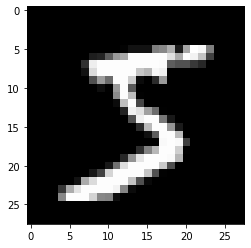

In [4]:
plt.imshow(x_train[0], cmap="gray")

In [5]:
# Shape of an image
x_train[0].shape

(28, 28)

In [6]:
# Building the Encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [7]:
# Building the Decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [8]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [9]:
autoencoder.compile(opt, loss='mse')

In [10]:
# Training the Model
autoencoder.fit(x_train,
                x_train,
                epochs=20, 
                batch_size=32,
                validation_split=0.10)
   
# Saving the model
autoencoder.save(f"models/autoencoder.h5")

Epoch 1/20
1688/1688 [==============================] - 9s 4ms/step - loss: 0.0222 - val_loss: 0.0162
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 8/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 9/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 10/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.013

In [25]:
example = encoder.predict([ x_test[3].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])

(64,)
[3.8522322  1.517976   0.         0.         1.7333379  0.
 2.6545885  0.8220421  1.3247615  0.56739354 2.2457945  2.2422178
 1.9194373  3.4339879  2.1101625  2.1639762  0.41952163 1.9346774
 1.7780559  1.3124939  0.65128255 1.0879335  1.9545715  2.2997541
 2.4178839  2.0323508  3.246307   2.338126   2.2749398  2.3009639
 2.095011   0.         2.885504   2.1090271  3.5080578  1.8993765
 0.9952933  1.5554262  2.030301   1.1667329  2.389685   0.9267409
 2.6617908  1.0491018  2.1096208  1.6914916  2.657433   0.
 1.0971773  2.972157   0.0065546  1.7704887  2.1987     2.4680145
 1.676275   2.7085323  2.305719   2.7918315  1.8262589  2.0829182
 1.3049976  2.1649532  1.6089449  1.71086   ]


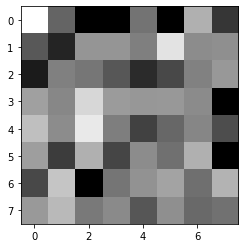

In [29]:
plt.imshow(example.reshape ((8,8)), cmap="gray")

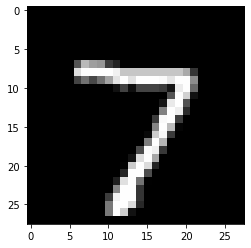

In [30]:
# Original Image

plt.imshow(x_test[0], cmap="gray")

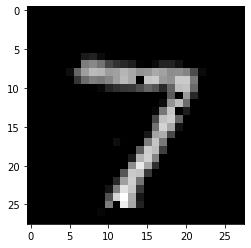

In [31]:
# Output generated Image

ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1) ])[0]
img = ae_out[:,:,0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(img, cmap="gray")

In [32]:
import random

def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

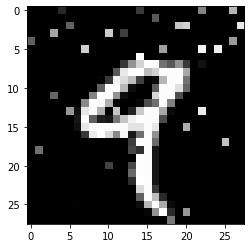

In [38]:
# Adding Noise to an image
noisy = add_noise(x_train[4])
plt.imshow(noisy, cmap="gray")

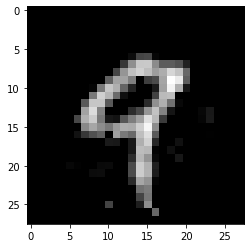

In [40]:
# Testing the autoencoder model to reduce noise
ae_out = autoencoder.predict([noisy.reshape(-1, 28, 28, 1) ])[0]
img = ae_out[:,:,0]
plt.imshow(img, cmap="gray")